# Neural Networks and Pytorch
## In this work, I begin with doing some readings, then getting some initiation to Tensors, Back-propagation, Hand-written digit recognition,  Language modeling.

## Then I manipulate some types of Neural Networks like the Convolutional applied on MNIST Data (the hello world of Data recognition....the hand digit recognition)

## Finally, I discover some NLP: N-Gram Language Modeling and CBOW: Continuous Bag-of-Words.

*************************************************************

## Réalisé par: Rekik Salah

## Tensors

In [1]:
import torch

a = torch.FloatTensor(2, 3)
print(a)
print(a.mean())


 8.5416e+30  4.5907e-41  0.0000e+00
 0.0000e+00  2.1802e-16  1.1513e-38
[torch.FloatTensor of size 2x3]

1.4236076726123415e+30


### are Numpy arrays inside

In [2]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


 8.5416e+30  0.0000e+00  0.0000e+00
 0.0000e+00  2.1802e-16  1.1513e-38
[torch.FloatTensor of size 2x3]



## Variables

In [11]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [5]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [4]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [5]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [4]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


On minimize $L(y - h(x))$ pas à pas:
Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

In [5]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

for alpha in [0.01,0.1, 0.2,1,10,100]:
    for i in range(100):
        h = torch.sigmoid(w * x + b)
        error = (y - h)**2
        error.backward()

        w.data.sub_(alpha * w.grad.data)
        w.grad.data.zero_()  # must reset to 0 before next pass

        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass
    
    print('alpha={} h={:.05f} w={:.05f} b={:.05f}'.format(alpha, h.data[0], w.data[0], b.data[0]))

    

alpha=0.01 h=0.89360 w=2.82636 b=-2.11576
alpha=0.1 h=0.24454 w=1.32310 b=-3.11793
alpha=0.2 h=0.20115 w=1.20953 b=-3.19365
alpha=1 h=0.20000 w=1.20633 b=-3.19578
alpha=10 h=0.20000 w=1.20633 b=-3.19578
alpha=100 h=0.20000 w=1.20633 b=-3.19578


Interprétation:

Selon le learning rate alpha, le résultat du backpropagagtion diffère Parfois, il converge et on obtient une erreur nulle comme dans le cas de alpha égale à 1, 10 et 100. Mais, parfois le backpropagation divèrge comme dans le cas de alpha égale à 0.01, 0.1 et 0.2. Ceci est due au faite que l'algorithme s'arrête en un minimum local.

# A vous de jouer !

Voici un jeu de données synthetique.

In [3]:
import numpy as np
import torch

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

On crée deux jeux séparés: train / test.

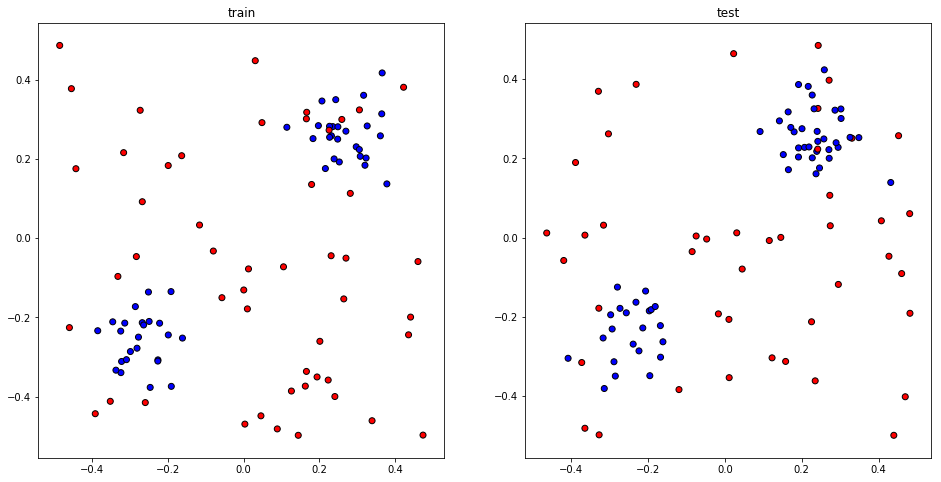

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

### Question
Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrics: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [11]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    H = torch.sigmoid(torch.matmul(X,W)+b)
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb, Y_mb, eps=1e-08).mean()

        # Backward pass
        loss.backward()

        # Parameter update (gradient descent)
        W.data.sub_(alpha * W.grad.data) #perforem W-alpha*W.grad.data
        W.grad.data.zero_()
        b.data.sub_(alpha*b.grad.data)
        b.grad.data.zero_()

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=0.716508	test loss=0.707355	0/1 error=0.450
Epoch 002	train loss=0.707309	test loss=0.710176	0/1 error=0.580
Epoch 003	train loss=0.700548	test loss=0.692591	0/1 error=0.450
Epoch 004	train loss=0.691612	test loss=0.688396	0/1 error=0.440
Epoch 005	train loss=0.691559	test loss=0.686881	0/1 error=0.410
Epoch 006	train loss=0.689107	test loss=0.678973	0/1 error=0.540
Epoch 007	train loss=0.691710	test loss=0.679667	0/1 error=0.510
Epoch 008	train loss=0.683524	test loss=0.683344	0/1 error=0.340
Epoch 009	train loss=0.685814	test loss=0.676956	0/1 error=0.460
Epoch 010	train loss=0.686367	test loss=0.677614	0/1 error=0.420
Epoch 011	train loss=0.683490	test loss=0.680990	0/1 error=0.380
Epoch 012	train loss=0.684277	test loss=0.676587	0/1 error=0.420
Epoch 013	train loss=0.685105	test loss=0.679232	0/1 error=0.380
Epoch 014	train loss=0.676815	test loss=0.674861	0/1 error=0.420
Epoch 015	train loss=0.680517	test loss=0.675342	0/1 error=0.420
Epoch 016	train loss=0.67

Epoch 135	train loss=0.684134	test loss=0.665472	0/1 error=0.280
Epoch 136	train loss=0.675727	test loss=0.668883	0/1 error=0.320
Epoch 137	train loss=0.680994	test loss=0.668063	0/1 error=0.310
Epoch 138	train loss=0.683956	test loss=0.671057	0/1 error=0.300
Epoch 139	train loss=0.676964	test loss=0.669980	0/1 error=0.310
Epoch 140	train loss=0.679020	test loss=0.667858	0/1 error=0.300
Epoch 141	train loss=0.674527	test loss=0.668535	0/1 error=0.310
Epoch 142	train loss=0.681179	test loss=0.670259	0/1 error=0.330
Epoch 143	train loss=0.683385	test loss=0.675921	0/1 error=0.430
Epoch 144	train loss=0.676011	test loss=0.670619	0/1 error=0.340
Epoch 145	train loss=0.662211	test loss=0.665001	0/1 error=0.320
Epoch 146	train loss=0.673086	test loss=0.668134	0/1 error=0.380
Epoch 147	train loss=0.678123	test loss=0.671661	0/1 error=0.410
Epoch 148	train loss=0.669262	test loss=0.664727	0/1 error=0.340
Epoch 149	train loss=0.680465	test loss=0.671538	0/1 error=0.410
Epoch 150	train loss=0.67

Visualisez la distribution apprise par votre modèle:

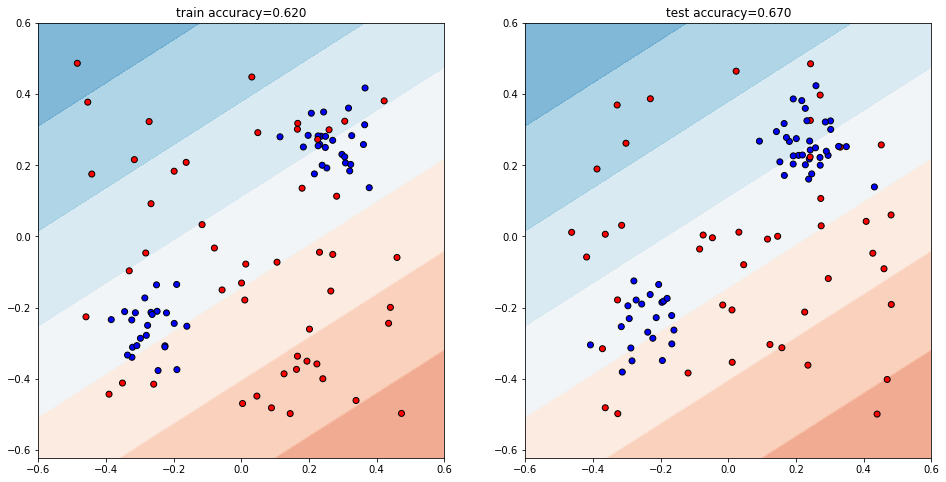

In [12]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

### Interprétation:
Dans notre cas, on a utilisé un réseau de neuronnes sans couches cahées. De plus, l'activation d'un neuronne est basé sur un simple comparaison du résultat du sigmoid(Z) à 0.5: Le neuronne sera activé si sigmoid(Z) est supérieur à 0.5.
Ainsi, on peut dire qu'il s'agit d'une séparation linéaire vu qu'on est basé sur une fonction linéaire Z= W * X + b.

### Question:
Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.

In [13]:
torch.manual_seed(0)

n_in = 2
params = []
n_out = 1
n_hidden_layer=10

W_1 = Variable(torch.normal(torch.zeros(n_in, n_hidden_layer), np.sqrt(2/(n_in + n_hidden_layer))), requires_grad=True)
b_1 = Variable(torch.zeros(n_hidden_layer), requires_grad=True)

W_2 = Variable(torch.normal(torch.zeros(n_hidden_layer, n_out), np.sqrt(2/(n_hidden_layer + n_out))), requires_grad=True)
b_2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    relu=torch.nn.ReLU()
    X_1=relu(torch.matmul(X,W_1)+b_1) 
    H = torch.sigmoid(torch.matmul(X_1,W_2)+b_2)
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb, Y_mb, eps=1e-08).mean()

        # Backward pass
        loss.backward()

        # Parameter update (gradient descent)
        W_2.data.sub_(alpha * W_2.grad.data)
        W_2.grad.data.zero_()

        b_2.data.sub_(alpha*b_2.grad.data)
        b_2.grad.data.zero_()

        W_1.data.sub_(alpha * W_1.grad.data)
        W_1.grad.data.zero_()

        b_1.data.sub_(alpha*b_1.grad.data)
        b_1.grad.data.zero_()

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=0.675340	test loss=0.674221	0/1 error=0.460
Epoch 002	train loss=0.648957	test loss=0.667173	0/1 error=0.540
Epoch 003	train loss=0.624419	test loss=0.631756	0/1 error=0.210
Epoch 004	train loss=0.602005	test loss=0.606003	0/1 error=0.210
Epoch 005	train loss=0.564234	test loss=0.584359	0/1 error=0.220
Epoch 006	train loss=0.546520	test loss=0.564064	0/1 error=0.180
Epoch 007	train loss=0.519436	test loss=0.546494	0/1 error=0.170
Epoch 008	train loss=0.506804	test loss=0.535467	0/1 error=0.170
Epoch 009	train loss=0.481051	test loss=0.523735	0/1 error=0.160
Epoch 010	train loss=0.473244	test loss=0.516223	0/1 error=0.160
Epoch 011	train loss=0.467544	test loss=0.514860	0/1 error=0.190
Epoch 012	train loss=0.455490	test loss=0.501742	0/1 error=0.150
Epoch 013	train loss=0.447767	test loss=0.505911	0/1 error=0.150
Epoch 014	train loss=0.424490	test loss=0.489726	0/1 error=0.160
Epoch 015	train loss=0.445204	test loss=0.500189	0/1 error=0.210
Epoch 016	train loss=0.42

Epoch 132	train loss=0.349822	test loss=0.455386	0/1 error=0.190
Epoch 133	train loss=0.381159	test loss=0.454312	0/1 error=0.170
Epoch 134	train loss=0.367118	test loss=0.441788	0/1 error=0.160
Epoch 135	train loss=0.377457	test loss=0.482067	0/1 error=0.170
Epoch 136	train loss=0.365547	test loss=0.476782	0/1 error=0.220
Epoch 137	train loss=0.358856	test loss=0.459423	0/1 error=0.180
Epoch 138	train loss=0.362002	test loss=0.453269	0/1 error=0.210
Epoch 139	train loss=0.380711	test loss=0.437507	0/1 error=0.150
Epoch 140	train loss=0.366416	test loss=0.468524	0/1 error=0.190
Epoch 141	train loss=0.373779	test loss=0.443051	0/1 error=0.150
Epoch 142	train loss=0.405791	test loss=0.524708	0/1 error=0.280
Epoch 143	train loss=0.352187	test loss=0.448565	0/1 error=0.190
Epoch 144	train loss=0.373616	test loss=0.457559	0/1 error=0.180
Epoch 145	train loss=0.354201	test loss=0.440937	0/1 error=0.150
Epoch 146	train loss=0.347643	test loss=0.494354	0/1 error=0.180
Epoch 147	train loss=0.35

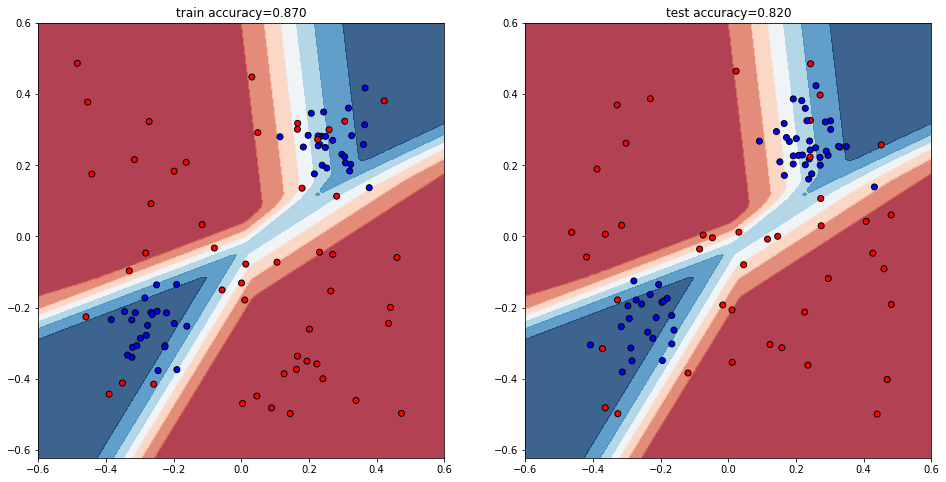

In [16]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

On remarque que la séparation est beaucoup mieux. En effer, on n'est plus dans le cas d'une séparation simplement linéaire mais plutôt on arrive à visualiser les différentes zones liées aux points bleu et les autres zones des points rouges.
De plus, avec un alpha de 0.1, on obtient un test_accuracy de 0.820 qui beaucoup mieux que 0.67.

### Bonus
améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc.

On ajoute une deuxième couche de 10 neuronnes et on garde les mêmes paramètres ( alpha = 0.1 , Relu ... )

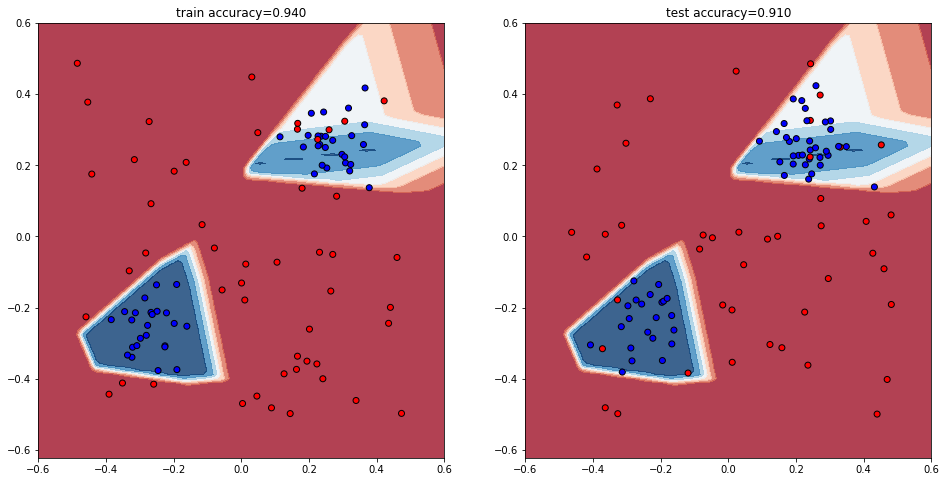

In [15]:
torch.manual_seed(0)

n_in = 2
params = []
n_out = 1

n_hidden_layer_1=10
n_hidden_layer_2=10

#init avec n_hidden+n_in et alpha=0.1 est tres different : separations lineaires. Mettre alpha=0.5 il retrouve les courbes (min local depassé?) 
W_1 = Variable(torch.normal(torch.zeros(n_in, n_hidden_layer_1), np.sqrt(2/(n_in + n_hidden_layer_1))), requires_grad=True)
b_1 = Variable(torch.zeros(n_hidden_layer_1), requires_grad=True)

W_2= Variable(torch.normal(torch.zeros(n_hidden_layer_1, n_hidden_layer_2), np.sqrt(2/(n_hidden_layer_2 + n_hidden_layer_1))), requires_grad=True)
b_2 = Variable(torch.zeros(n_hidden_layer_2), requires_grad=True)

W_3= Variable(torch.normal(torch.zeros(n_hidden_layer_2, n_out), np.sqrt(2/(n_hidden_layer_2 + n_out))), requires_grad=True)
b_3 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    relu=torch.nn.ReLU()
    X_1=relu(torch.matmul(X,W_1)+b_1) 
    X_2=relu(torch.matmul(X_1,W_2)+b_2)
    H = torch.sigmoid(torch.matmul(X_2,W_3)+b_3)
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb, Y_mb, eps=1e-08).mean()

        # Backward pass
        loss.backward()

        # Parameter update (gradient descent)
        W_3.data.sub_(alpha * W_3.grad.data) #perforem W-alpha*W.grad.data
        W_3.grad.data.zero_()

        b_3.data.sub_(alpha*b_3.grad.data)
        b_3.grad.data.zero_()
        
        W_2.data.sub_(alpha * W_2.grad.data) #perforem W-alpha*W.grad.data
        W_2.grad.data.zero_()

        b_2.data.sub_(alpha*b_2.grad.data)
        b_2.grad.data.zero_()

        W_1.data.sub_(alpha * W_1.grad.data)
        W_1.grad.data.zero_()

        b_1.data.sub_(alpha*b_1.grad.data)
        b_1.grad.data.zero_()

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()


map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

On trouve une meilleur résultat avec une accuracy de 0.910 pour le test. En effer, les deux zones bleus sont mieux décrit maintenant et on voit bien une séparation entre les rouges et bleus. L'erreur est minime vu que les pointes rouges mal classés sont négligables par rapport aux points bleus qui appartiennent à la même zone que ces rouges.

# MNIST

Vous allez maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc.

On commence par charger les données:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms

mnist_folder = 'D:\Eclyon\TP MGP\TP'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

In [6]:
print("Nombre d'images dans le train set:", len(train_data))
print("Nombre d'images dans le train set:", len(test_data))

Nombre d'images dans le train set: 60000
Nombre d'images dans le train set: 10000


### Afficher quelques images

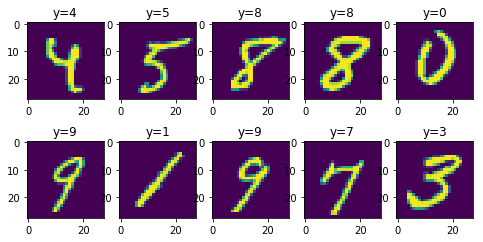

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 123 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy()
    y = train_data[idx][1]
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y={}'.format(y))
    
plt.show()

### Modèle initial

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.3
epochs = 30
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, X):
        X = X.view(-1, 28*28)  # flatten images
        X = self.fc1(X)
        return F.log_softmax(X)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))


Epoch 1...


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train negative log-likelihood: 0.379747
Test  negative log-likelihood: 0.295435 0/1 error: 0.083200
Epoch 2...
Train negative log-likelihood: 0.302734
Test  negative log-likelihood: 0.285462 0/1 error: 0.082000
Epoch 3...
Train negative log-likelihood: 0.289852
Test  negative log-likelihood: 0.278826 0/1 error: 0.078400
Epoch 4...
Train negative log-likelihood: 0.283040
Test  negative log-likelihood: 0.284368 0/1 error: 0.079700
Epoch 5...
Train negative log-likelihood: 0.278293
Test  negative log-likelihood: 0.273310 0/1 error: 0.074600
Epoch 6...
Train negative log-likelihood: 0.274800
Test  negative log-likelihood: 0.281287 0/1 error: 0.081700
Epoch 7...
Train negative log-likelihood: 0.271657
Test  negative log-likelihood: 0.277397 0/1 error: 0.079500
Epoch 8...
Train negative log-likelihood: 0.268528
Test  negative log-likelihood: 0.270390 0/1 error: 0.076000
Epoch 9...
Train negative log-likelihood: 0.266989
Test  negative log-likelihood: 0.277471 0/1 error: 0.075200
Epoch 10...


### Question
Jouez avec les paramètres suivants:
- lr
- epochs
- train_batch_size

Quelle est la meilleure performance (0/1 error) que vous arrivez à atteindre?

--> notre erreur initial est 0.0753
On commence par changer le Learning rate vers 0.2 et le nombre epochs vers 50.
    On obtient une erreur de 0.0740

On teste une autre fois avec lr = 0.3 epochs = 30
    on obtient une erreur de 0.0772
    
=> On remarque qu'on converge toujours vers une erreur aux alentours de 0.07. Donc, on doit améliorer le modèle.

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées
- convolutions + max pooling
- dropout
- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$ (torch.optim.lr_scheduler.ReduceLROnPlateau)

#### On suppose le modèle suivant:
 alpha: 0.2
 le nombre epochs: 30
 train_batch_size: 50
#### 1. Ajout d'une couche cachée
on ajoute une couche cachée de 200 neuronnes.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


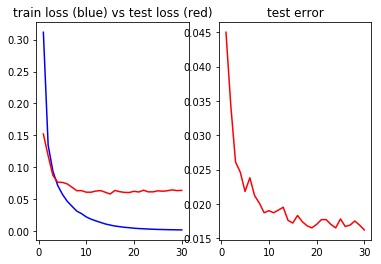

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

seed = 1337
lr = 0.2
epochs = 30
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() #initialize nn.Module init method super->herits
        self.fc1 = nn.Linear(28*28, 200) #linear transformation Ax+b with params size_in, size_out
        self.fc2 = nn.Linear(200, 10)
    def forward(self, X):
        relu =torch.nn.ReLU()
        X = X.view(-1, 28*28)  # flatten images
        X = relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error

train_loss_list=[]
test_loss_list=[]
test_error_list=[]
for epoch in range(1, epochs + 1):
    
    #print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    train_loss_list.append(train_loss.data[0])
    
    test_loss, test_error = test()
    #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    test_loss_list.append(test_loss)
    test_error_list.append(test_error)

fig=plt.figure()
plt.subplot(121)
plt.plot(range(1,epochs+1),train_loss_list,'b',range(1,epochs+1),test_loss_list,'r')
plt.title('train loss (blue) vs test loss (red)')
plt.subplot(122)
plt.plot(range(1,epochs+1),test_error_list,'r')
plt.title('test error')
plt.show()

D'après la première coube, on remarque que le test loss diminue mais reste plus grand que le training loss: ce qui est normale vu que un modèle est toujours plus performant sur les données de training.
Plus important, on a un test_error = 0.016 qui très bien vu qu'on avaut une erreur de 0.07. Mais, on encore légèrement supérieur au 1% souhaité.

#### On ajoute une autre couche cachée
une deuxième couche cachée de 200 neuronnes.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


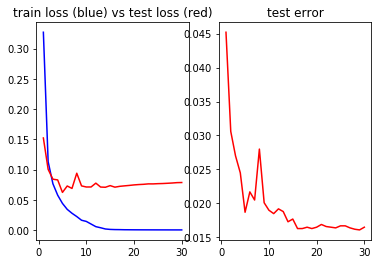

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

seed = 1337
lr = 0.2
epochs = 30
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() #initialize nn.Module init method super->herits
        self.fc1 = nn.Linear(28*28, 200) #linear transformation Ax+b with params size_in, size_out
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)
    def forward(self, X):
        relu =torch.nn.ReLU()
        X = X.view(-1, 28*28)  # flatten images
        X = relu(self.fc1(X))
        X = relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error

train_loss_list=[]
test_loss_list=[]
test_error_list=[]
for epoch in range(1, epochs + 1):
    
    #print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    train_loss_list.append(train_loss.data[0])
    
    test_loss, test_error = test()
    #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    test_loss_list.append(test_loss)
    test_error_list.append(test_error)

fig=plt.figure()
plt.subplot(121)
plt.plot(range(1,epochs+1),train_loss_list,'b',range(1,epochs+1),test_loss_list,'r')
plt.title('train loss (blue) vs test loss (red)')
plt.subplot(122)
plt.plot(range(1,epochs+1),test_error_list,'r')
plt.title('test error')
plt.show()

On remarque que même en ajoutant une autre couche de neuronnes, l'erreur ne retombe pas.
#### Utilisation du learning rate decay
on utilise optim.lr_scheduler.ReduceLROnPlateau() à chaque itération (époches)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


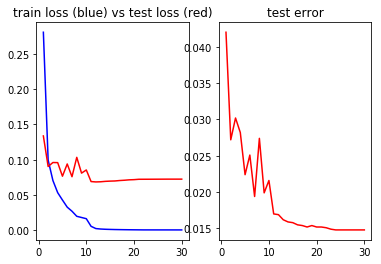

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

seed = 1337
lr = 0.5
epochs = 30
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() #initialize nn.Module init method super->herits
        self.fc1 = nn.Linear(28*28, 200) #linear transformation Ax+b with params size_in, size_out
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)
    def forward(self, X):
        relu =torch.nn.ReLU()
        X = X.view(-1, 28*28)  # flatten images
        X = relu(self.fc1(X))
        X = relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error

train_loss_list=[]
test_loss_list=[]
test_error_list=[]

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.1,patience=5,threshold=0.001)
for epoch in range(1, epochs + 1):
    
    #print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    #scheduler.step(train_loss)
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    train_loss_list.append(train_loss.data[0])
    
    test_loss, test_error = test()
    scheduler.step(test_loss)
    scheduler.step(test_error)
    #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    test_loss_list.append(test_loss)
    test_error_list.append(test_error)

fig=plt.figure()
plt.subplot(121)
plt.plot(range(1,epochs+1),train_loss_list,'b',range(1,epochs+1),test_loss_list,'r')
plt.title('train loss (blue) vs test loss (red)')
plt.subplot(122)
plt.plot(range(1,epochs+1),test_error_list,'r')
plt.title('test error')
plt.show()

* Premier Test : 
    Learning rate initial : 0.2
    * On a une erreur de 0.016
* Deuxième Test:
    Learning rate initial : 0.5
    * On a une erreur de 0.015
-> on est toujouers supérieur à 1% d'erreur

#### Ajout d'une couche de convolution
On prend le code précédent et on ajoute une couche de convolution pour mieux déterminer le voisinnage de chaque pixels, et un pooling pour réduire le nombre de features.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1, Test set: Average loss: 0.1307, Accuracy: 9644/10000 (96.44%)

Epoch 2, Test set: Average loss: 0.0658, Accuracy: 9821/10000 (98.21%)

Epoch 3, Test set: Average loss: 0.0636, Accuracy: 9814/10000 (98.14%)

Epoch 4, Test set: Average loss: 0.0504, Accuracy: 9856/10000 (98.56%)

Epoch 5, Test set: Average loss: 0.0463, Accuracy: 9871/10000 (98.71%)

Epoch 6, Test set: Average loss: 0.0443, Accuracy: 9873/10000 (98.73%)

Epoch 7, Test set: Average loss: 0.0497, Accuracy: 9866/10000 (98.66%)

Epoch 8, Test set: Average loss: 0.0462, Accuracy: 9876/10000 (98.76%)

Epoch 9, Test set: Average loss: 0.0675, Accuracy: 9818/10000 (98.18%)

Epoch 10, Test set: Average loss: 0.0505, Accuracy: 9868/10000 (98.68%)

Epoch 11, Test set: Average loss: 0.0524, Accuracy: 9874/10000 (98.74%)

Epoch 12, Test set: Average loss: 0.0393, Accuracy: 9904/10000 (99.04%)

Epoch 13, Test set: Average loss: 0.0377, Accuracy: 9905/10000 (99.05%)

Epoch 14, Test set: Average loss: 0.0361, Accuracy: 9911/100

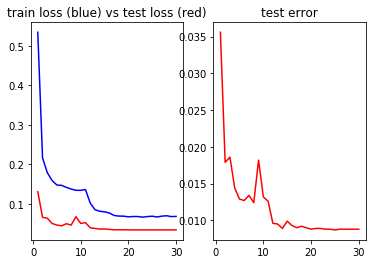

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

seed = 1337
lr = 0.3
epochs = 30
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() #initialize nn.Module init method super->herits
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 200) #linear transformation Ax+b with params size_in, size_out
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)
    def forward(self, X):
        #relu =torch.nn.ReLU()
        X = F.relu(F.max_pool2d(self.conv1(X), 2))
        X = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(X)), 2))
        X = X.view(-1, 320)  # flatten images
        X = F.relu(self.fc1(X))
        X = F.dropout(X, training=self.training)
        X = F.relu(self.fc2(X))
        X = F.dropout(X, training=self.training)
        X = self.fc3(X)
        return F.log_softmax(X)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        # Forward pass
        Y_pred_prob = model(X)
        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        # Backward pass
        loss.backward()
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()
        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    correct = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()
        correct += Y_pred.eq(Y.data.view_as(Y_pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)
    print('Epoch {}, Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        epoch, test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    return test_loss, test_error

train_loss_list=[]
test_loss_list=[]
test_error_list=[]

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.1,patience=5,threshold=0.001)
for epoch in range(1, epochs + 1):
    
    #print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    train_loss_list.append(train_loss.data[0])
    
    test_loss, test_error = test()
    scheduler.step(test_loss)
    scheduler.step(test_error)
    #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    test_loss_list.append(test_loss)
    test_error_list.append(test_error)
   

fig=plt.figure()
plt.subplot(121)
plt.plot(range(1,epochs+1),train_loss_list,'b',range(1,epochs+1),test_loss_list,'r')
plt.title('train loss (blue) vs test loss (red)')
plt.subplot(122)
plt.plot(range(1,epochs+1),test_error_list,'r')
plt.title('test error')
plt.show()

Enfin, on arrive à une erreur qui est inférieur à 1% (0.88%).
#### Remarque: avec un learning rate de 0.5, on a obtenu une erreur de 2%. C'est pourquoi on a diminué lr initial à 0.3 .

## NLP: N-Gram Language Modeling

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

In [9]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
 518.7622
[torch.FloatTensor of size 1]
, 
 495.1088
[torch.FloatTensor of size 1]
, 
 472.5218
[torch.FloatTensor of size 1]
, 
 450.3365
[torch.FloatTensor of size 1]
, 
 428.1061
[torch.FloatTensor of size 1]
, 
 405.4250
[torch.FloatTensor of size 1]
, 
 381.9893
[torch.FloatTensor of size 1]
, 
 357.7012
[torch.FloatTensor of size 1]
, 
 332.5385
[torch.FloatTensor of size 1]
, 
 306.7039
[torch.FloatTensor of size 1]
, 
 280.3929
[torch.FloatTensor of size 1]
, 
 253.9211
[torch.FloatTensor of size 1]
, 
 227.7106
[torch.FloatTensor of size 1]
, 
 202.2512
[torch.FloatTensor of size 1]
, 
 178.0069
[torch.FloatTensor of size 1]
, 
 155.4082
[torch.FloatTensor of size 1]
, 
 134.8259
[torch.FloatTensor of size 1]
, 
 116.4589
[torch.FloatTensor of size 1]
, 
 100.3998
[torch.FloatTensor of size 1]
, 
 86.5518
[torch.FloatTensor of size 1]
, 
 74.7808
[torch.FloatTensor of size 1]
, 
 64.8346
[torch.FloatTensor of size 1]
, 
 56.5205
[torch.FloatTensor of size 1]
, 
 49.6104
[tor

### Utilisez vos propres valeurs pour context

On teste le modèle avec les mots: blood et warm.
On évite les mots qui ont une virgule attachée vu que la ponctuation est toujours là...

In [10]:
# context = # TODO
context = ['blood', 'warm']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['blood', 'warm'] when


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Le résultat "when" est bien valide!

## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [14]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

CONTEXT_SIZE = 4  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

class CBOW(nn.Module):

    def __init__(self,vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, EMBEDDING_DIM)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs

losses = []
loss_function = nn.NLLLoss()
model = CBOW(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)
    
for epoch in range(1000):
    total_loss = torch.Tensor([0])
    for context, target in data:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_var = make_context_vector(context,word_to_ix)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
 225.8210
[torch.FloatTensor of size 1]
, 
 210.1487
[torch.FloatTensor of size 1]
, 
 195.3129
[torch.FloatTensor of size 1]
, 
 180.9489
[torch.FloatTensor of size 1]
, 
 166.9374
[torch.FloatTensor of size 1]
, 
 153.2218
[torch.FloatTensor of size 1]
, 
 139.5339
[torch.FloatTensor of size 1]
, 
 125.7653
[torch.FloatTensor of size 1]
, 
 111.9473
[torch.FloatTensor of size 1]
, 
 98.2331
[torch.FloatTensor of size 1]
, 
 84.8984
[torch.FloatTensor of size 1]
, 
 72.2941
[torch.FloatTensor of size 1]
, 
 60.7268
[torch.FloatTensor of size 1]
, 
 50.4606
[torch.FloatTensor of size 1]
, 
 41.6338
[torch.FloatTensor of size 1]
, 
 34.3138
[torch.FloatTensor of size 1]
, 
 28.3427
[torch.FloatTensor of size 1]
, 
 23.5754
[torch.FloatTensor of size 1]
, 
 19.8058
[torch.FloatTensor of size 1]
, 
 16.8363
[torch.FloatTensor of size 1]
, 
 14.4805
[torch.FloatTensor of size 1]
, 
 12.6077
[torch.FloatTensor of size 1]
, 
 11.0964
[torch.FloatTensor of size 1]
, 
 9.8638
[torch.FloatTen

On teste avec un certain contexte, et on obtient bien un résultat valide

In [15]:
context = ['processes', 'manipulate', 'abstract', 'things']
context_var=make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['processes', 'manipulate', 'abstract', 'things'] other


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
